# Grover Search Algorithm
Design for qiskit version 2.0.3

Author: Matías Hernández Serrano
 
Version: 1.0.0

Date: 2025-07-02

This code is based on the Qiskit implementation of the Grover Search Algorithm. It uses quantum_algorithms.py, graph_coloring.py and utils.py to 
define the gates needed for the algorithm. The user has to design the topology or can use his own topology. 


In [1]:
from quantum_algorithms import *
from graph_coloring import *
from utils import *

First we have to create a topology for the algorithm

If you have a previous topology, you can use it later

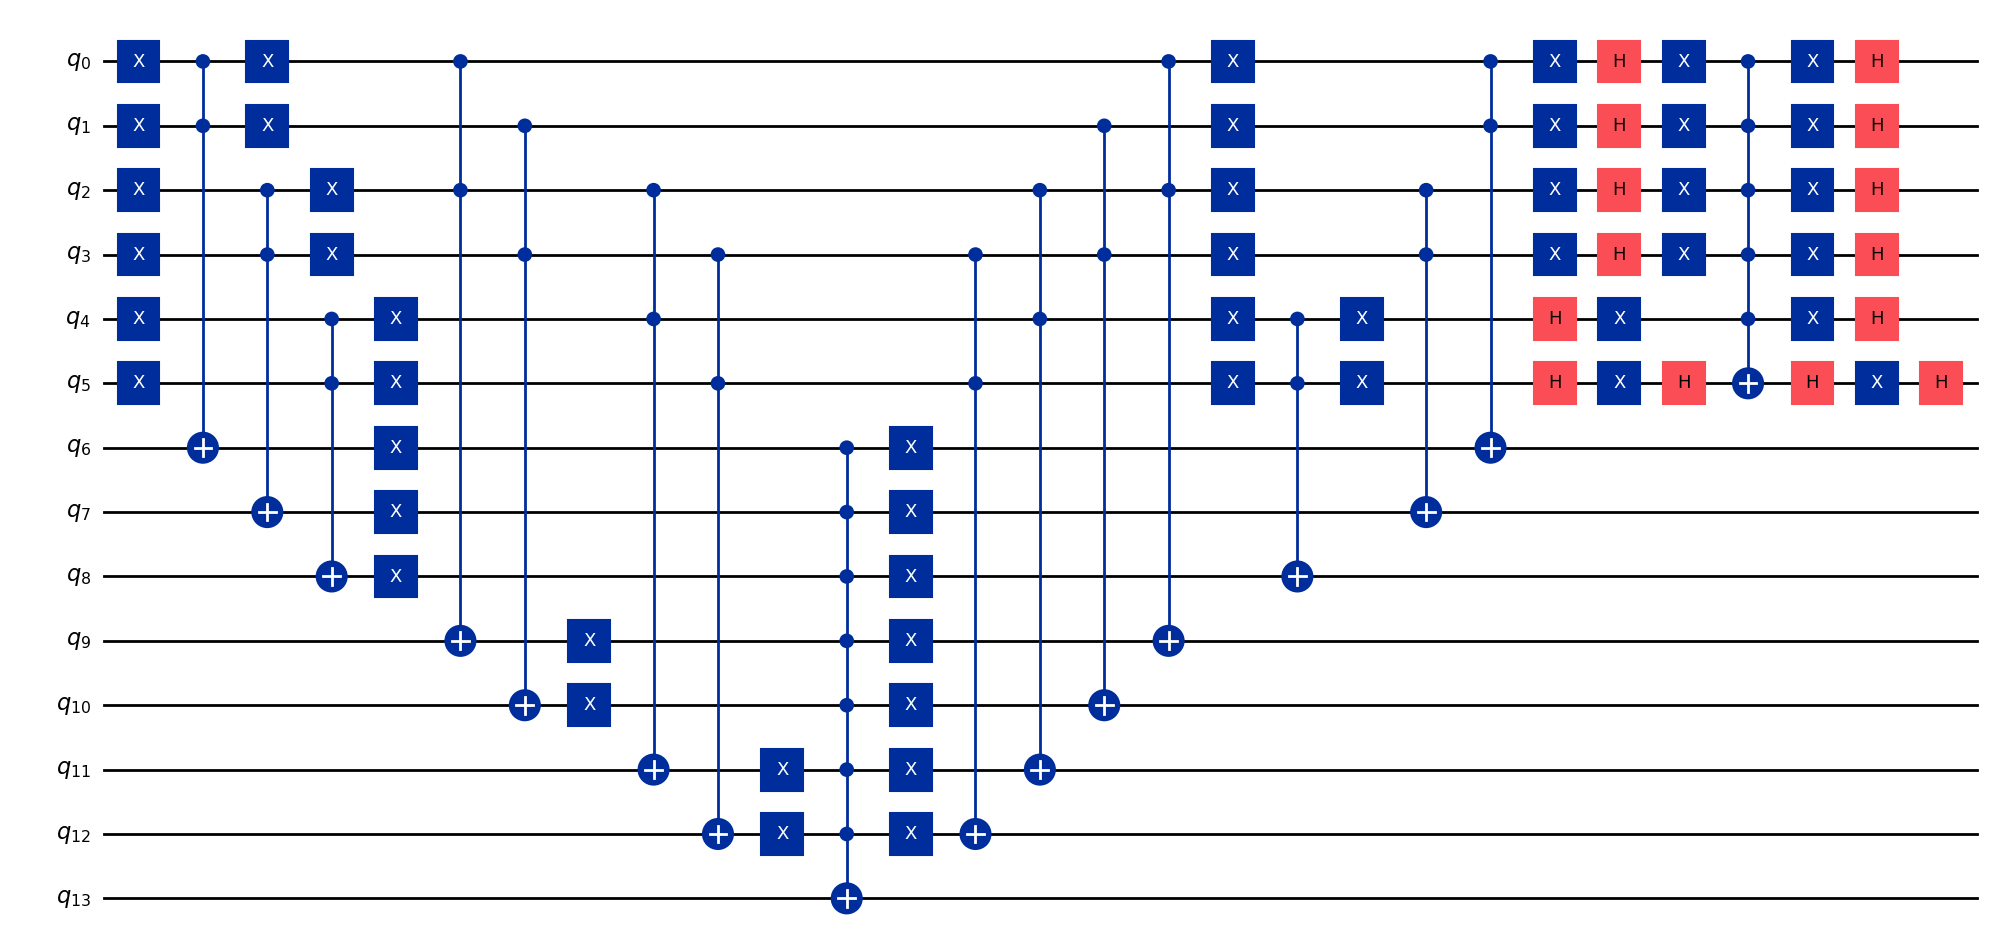

In [2]:
# User variables
nodes = 3
edges = [(0, 1), (1, 2)]
colors = 2

oracle = graph_coloring_oracle_sat_formula(nodes, edges, colors, use_extendedEdges=False)
oracle.draw(output='mpl', fold = -1)


n is the number of qubits of the oracle, without the ancilla qubits.

m is the number of solutions, it can be obtained using the Quantum Counting Algorithm.

Use the Quantum_Counting.ipynb in case you want to explore how to obtain the number of solutions with your oracle.

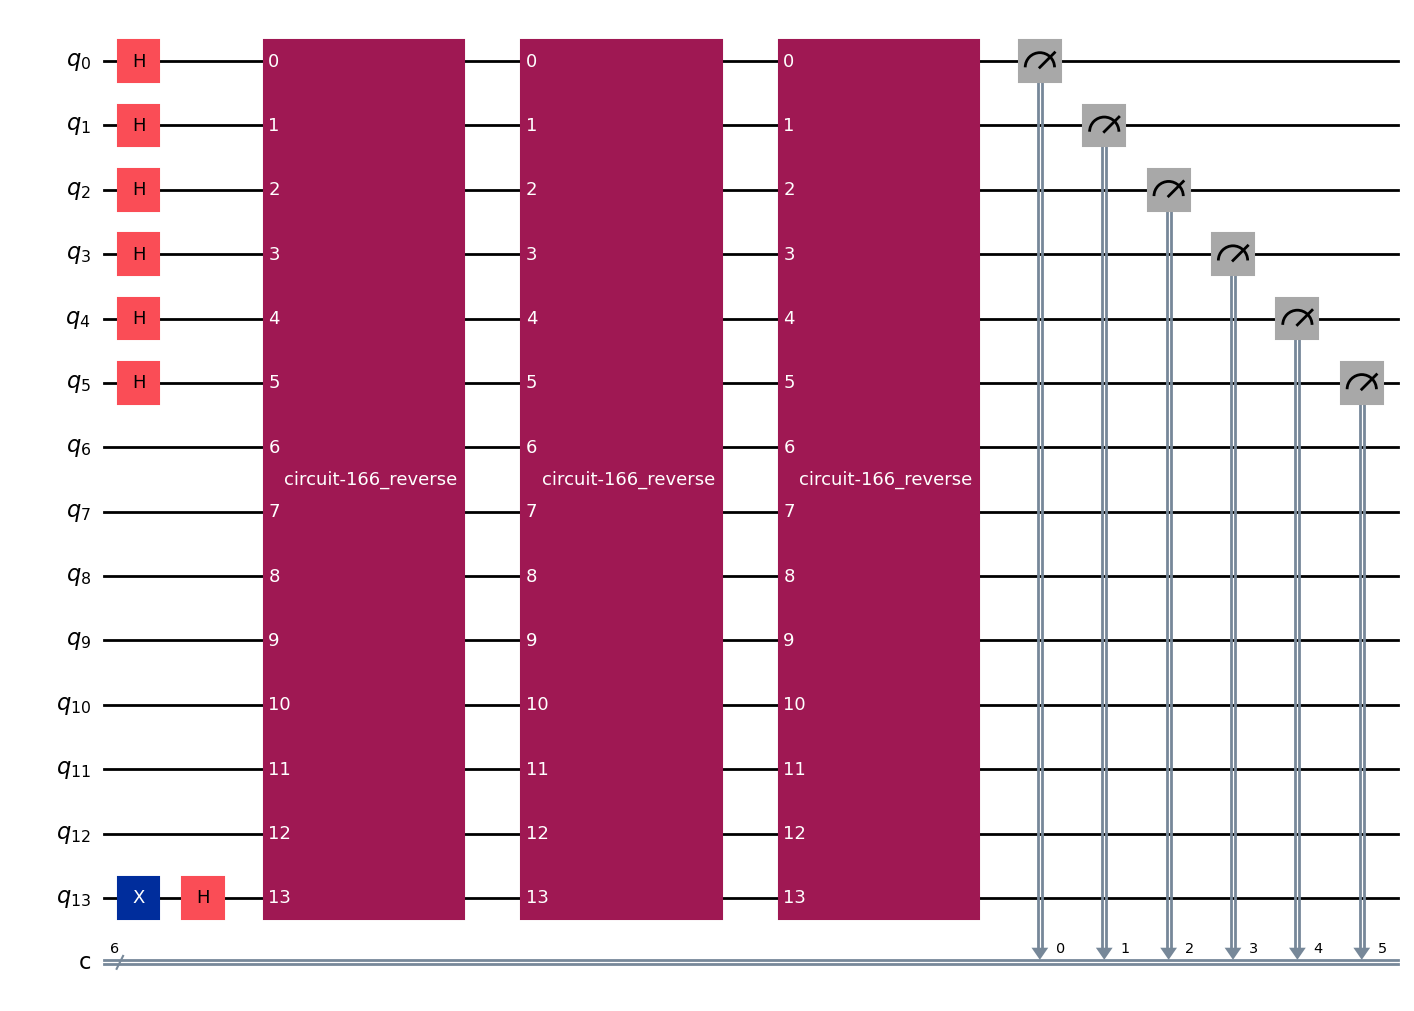

In [3]:
n = nodes * colors
m = 2
# Grover Search

grover_search = create_grover_search(oracle, m, n)
grover_search.draw(output='mpl')


Now we are ready to simulate the algorithm and plot the results

c:\Users\matto\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\providers\fake_provider\generic_backend_v2.py:348: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


Top 2 most frequent results:
011001: 471 times
100110: 451 times


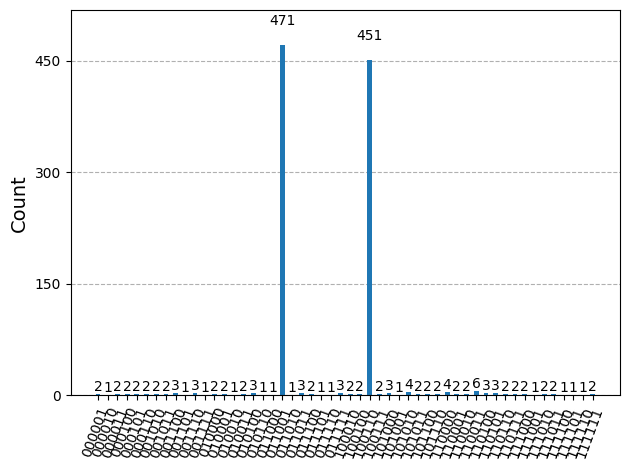

In [ ]:
simulator_backend = GenericBackendV2(num_qubits=oracle.num_qubits)
pm = generate_preset_pass_manager(backend=simulator_backend, optimization_level=2)


circuit = pm.run(grover_search)


job2 = simulator_backend.run(circuit, shots=1024)
result = job2.result()
counts = result.get_counts(circuit)


top_2 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:m]
print("Top 2 most frequent results:")
for bitstring, freq in top_2:
    print(f"{bitstring}: {freq} times")

plot_histogram(counts)
